### Power Transformation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [32]:
df = pd.read_csv('concrete_data.csv')

In [33]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [34]:
df.shape

(1030, 9)

In [35]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [36]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [37]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Applying Regression without any transformation

In [39]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314852

## Cross checking with cross val score

In [40]:
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662864

## Plotting the distplots without any transformation

In [41]:
import warnings
warnings.filterwarnings("ignore")

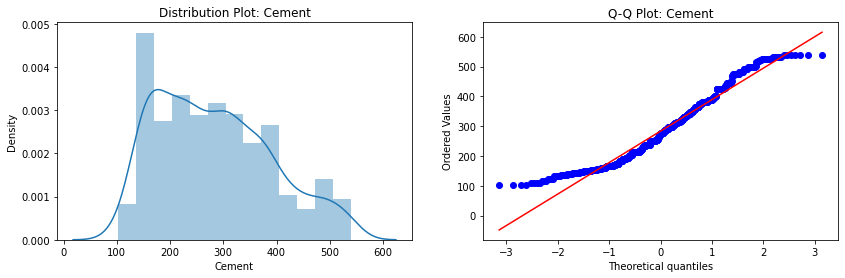

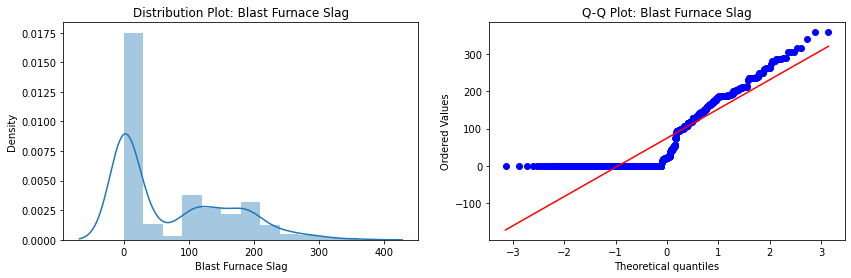

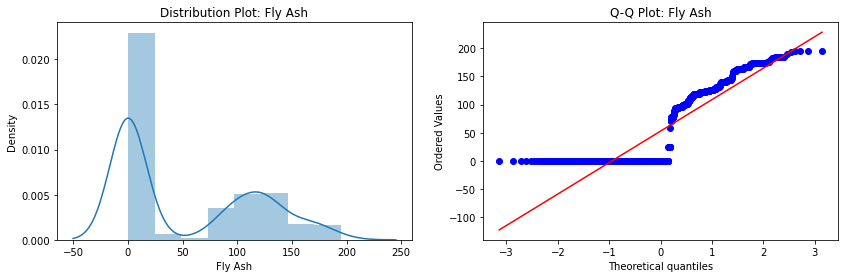

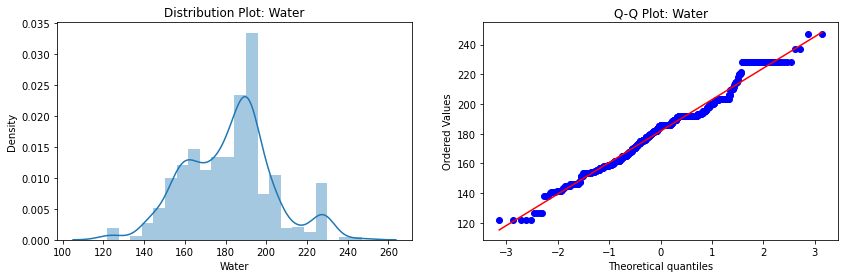

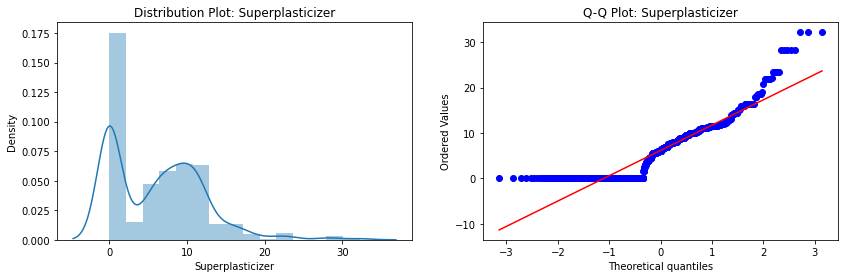

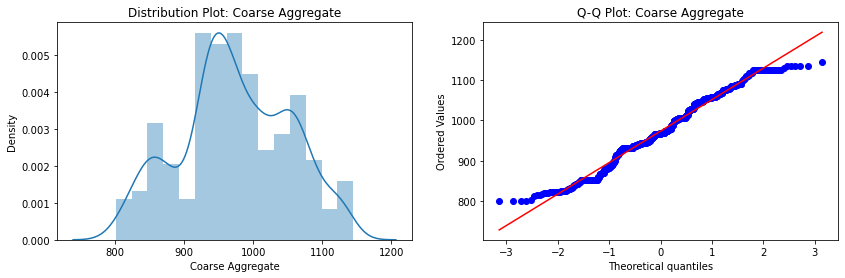

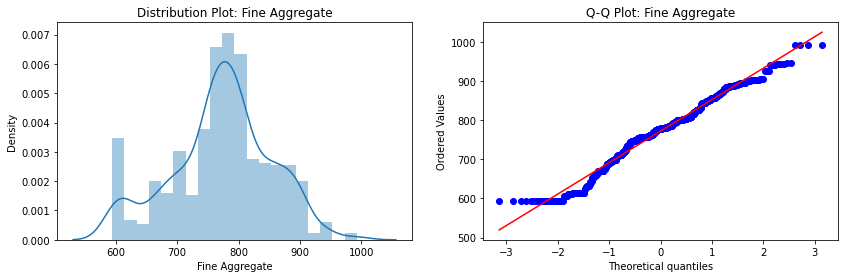

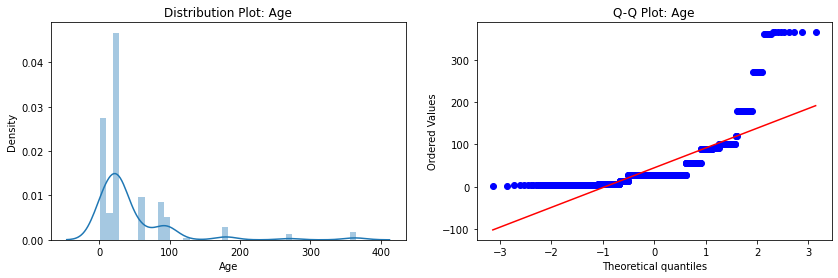

In [42]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(f"Distribution Plot: {col}")

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {col}")

    plt.show()

### Applying Box-Cox Transform

In [43]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)  # adding small value 0.000001 in every record to ignore zero if any
X_test_transformed = pt.transform(X_test+0.000001)

# let's have look into lambda values for different columns
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


### Applying linear regression on transformed data

In [44]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825006181187

- Good improvement but lets cross check with Cross validation:

In [45]:
# Using cross val score

pt1 = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537942219861

### Comparison Plot Before and after Box-Cox Transformation

In [46]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_train_transformed.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.956151,1.128045,-0.301920,0.898506,-0.262500,-0.677568,0.10601
1,1.244706,0.701994,1.137577,-0.165055,0.749235,-1.912728,-0.314062,0.10601
2,0.079842,-1.085667,1.131407,-1.047291,0.788486,1.018407,0.025957,-1.67597
3,-0.145641,0.898125,1.096514,0.581224,0.733792,-1.750779,0.583253,0.10601
4,-1.131044,0.787203,1.133149,-1.105297,0.811152,1.368575,0.262623,-1.67597


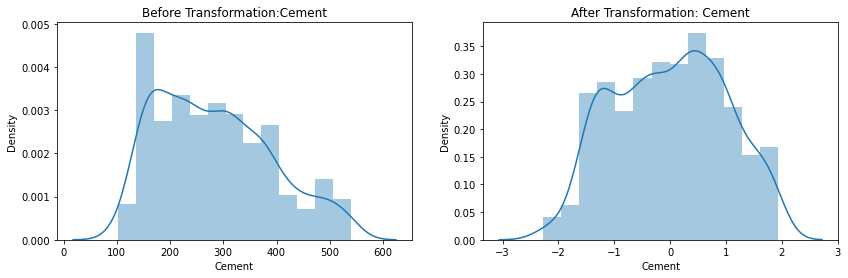

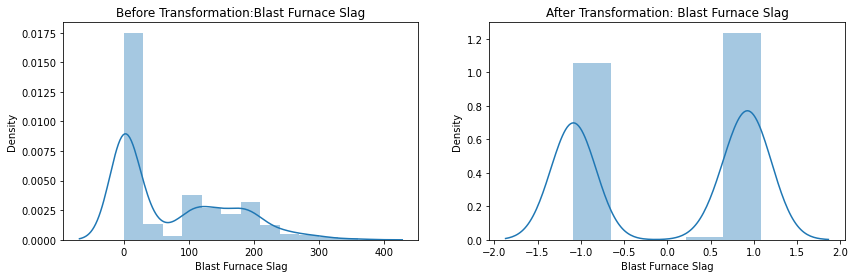

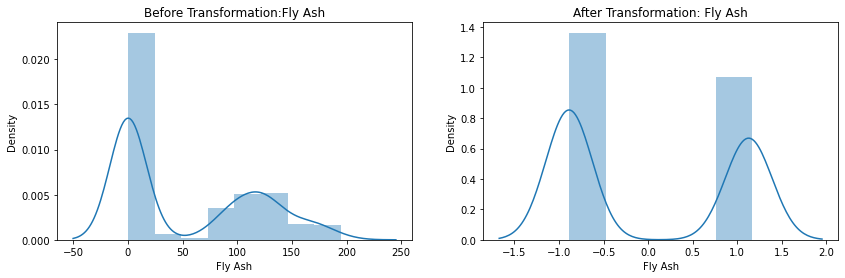

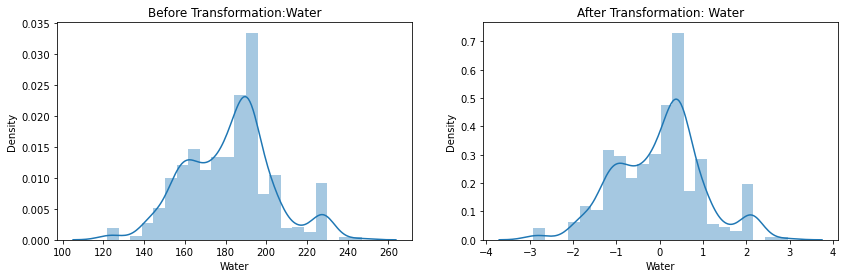

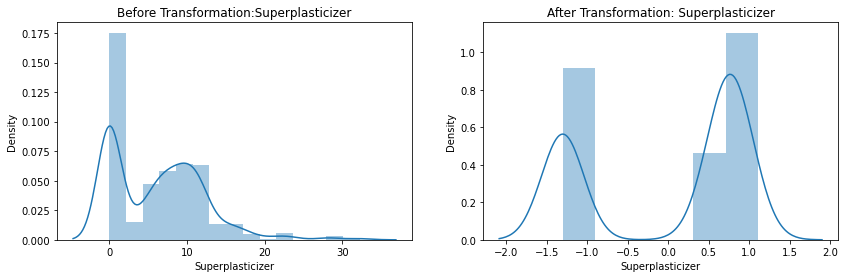

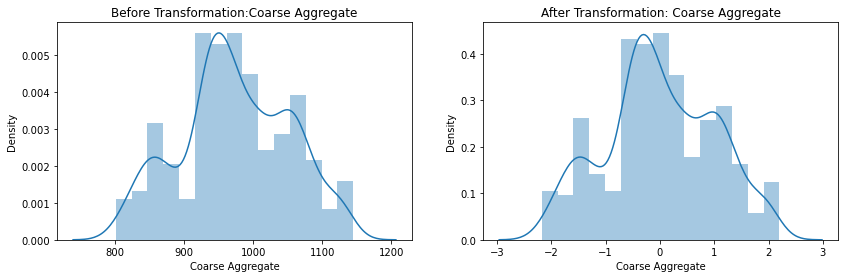

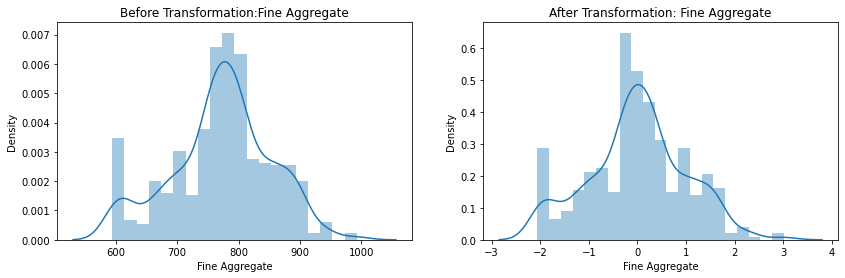

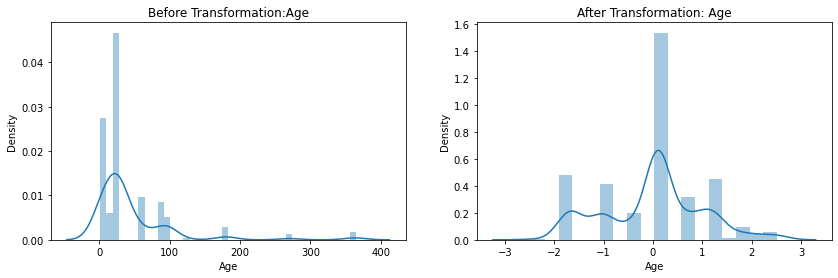

In [47]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(f"Before Transformation:{col}")

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(f"After Transformation: {col}")

    plt.show()

### Apply Yeo-Johnson Transform

In [49]:
pt2 = PowerTransformer(method='yeo-johnson')

X_train_transformed2 = pt2.fit_transform(X_train)
X_test_transformed2 = pt2.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

# Lambda values for all columns:
pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt2.lambdas_})

0.8161906513339305


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


#### Cross validation

In [51]:
pt3 = PowerTransformer(method='yeo-johnson')
X_transformed2 = pt3.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625134285742

- Get improvement in R2 score of 0.2

In [52]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

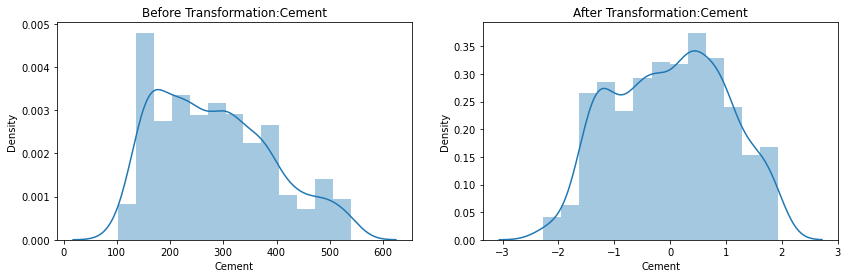

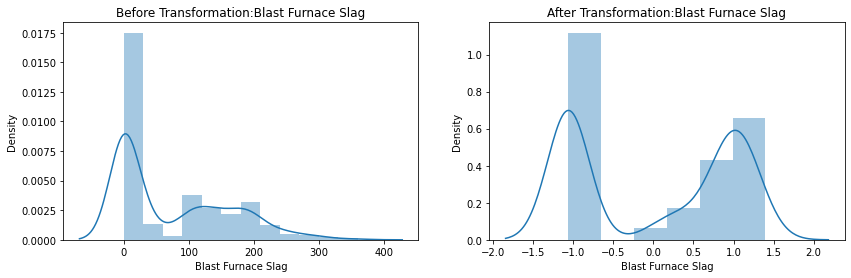

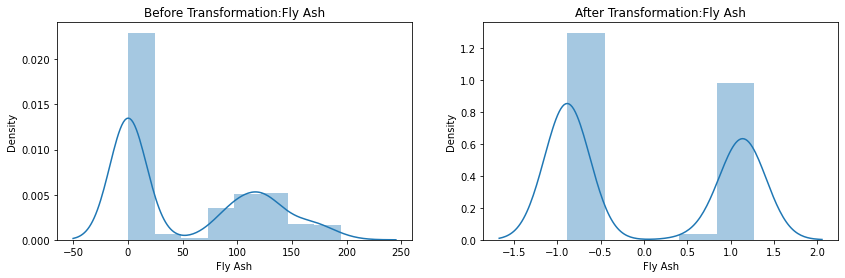

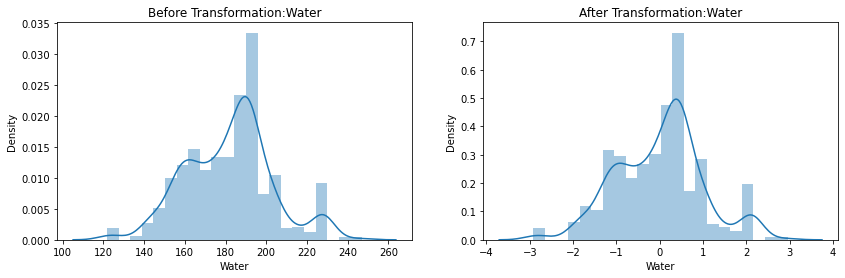

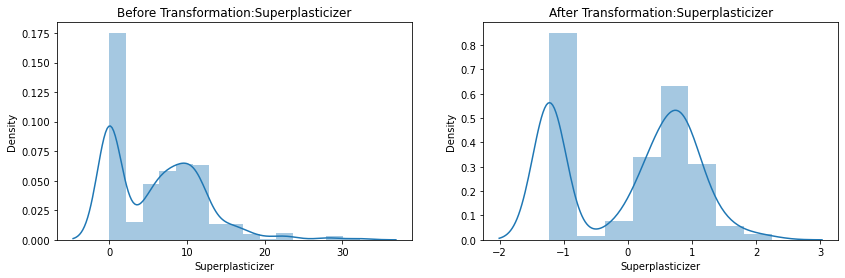

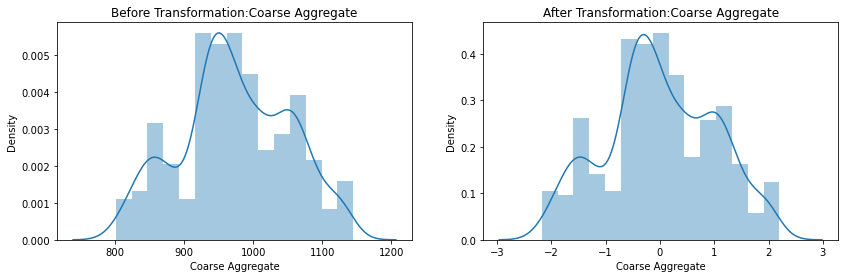

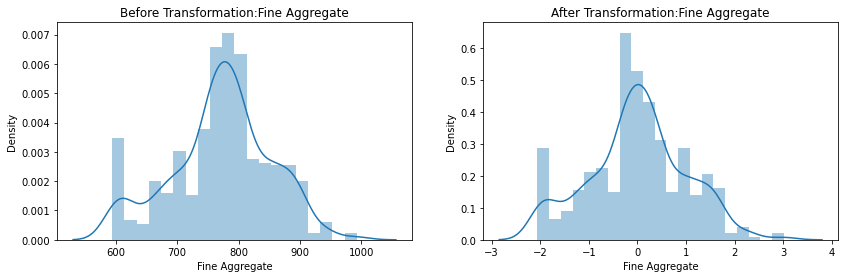

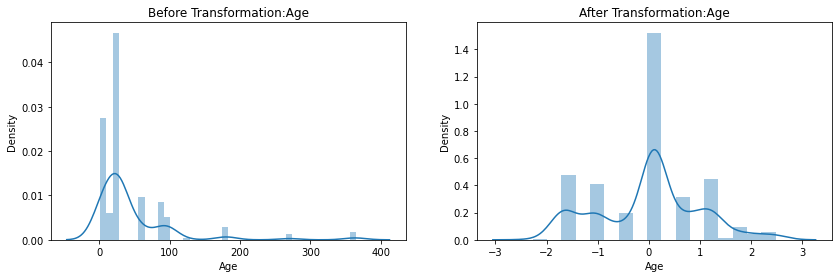

In [53]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(f"Before Transformation:{col}")

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(f"After Transformation:{col}")

    plt.show()

In [55]:
# Side by side Lambdas
pd.DataFrame({'Cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt2.lambdas_})

,Cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.022924,0.015715
2,Fly Ash,-0.028797,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.087911,0.253935
5,Coarse Aggregate,1.129168,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885
